# The Spark Foundation - Data Science and Business Analytics Internship 

## Task 1 - Prediction using Supervised Machine Learning 

### Predict the percentage of an student based on the no. of study hours
#### Author - Veerdhaval Pradeep Barkade

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [4]:
#loading dataset.
data=pd.read_csv("http://bit.ly/w-data")

In [5]:
#displaying 5 rows of dataset.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
#checking whether there is null value or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


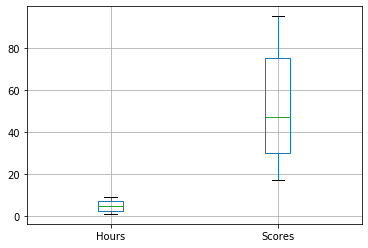

In [10]:
#ploting_box plot.
box_plot=data.boxplot(column=['Hours','Scores'])

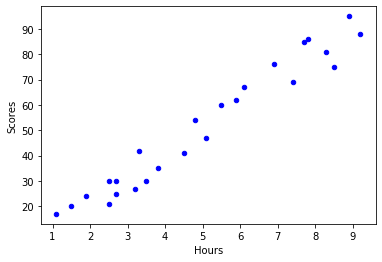

In [11]:
#ploting distribution of scores.
data.plot(kind='scatter',x='Hours',y='Scores',color='blue')
plt.show()

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### From above paragraph we can clearly see that there is positive relation between the number of hours studied and percentage of score

### Preparing the data

In [14]:
#divide the data into input and output.
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 

### Train the Model

In [16]:
#training our algorithm.
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

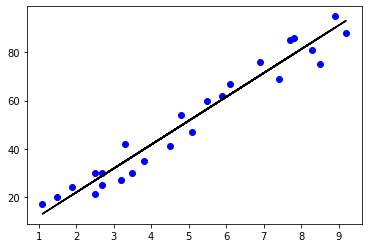

In [17]:
#ploting regression line.
reg_line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y,color='blue')
plt.plot(X,reg_line,color='black')
plt.show()

In [18]:
#predicting the scores.
Y_pred=regressor.predict(X_test)

In [20]:
#comparing actual and predicted scores.
df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the predicted score if a student studies for 9.25hrs/day?

In [26]:
hours=9.25
hours1=np.array(hours).reshape(1,-1)
predict_own=regressor.predict(hours1)
print("No of Hours : {}".format(hours))
print("Predicted Score :{} ".format(predict_own[0]))

No of Hours : 9.25
Predicted Score :93.69173248737538 


In [27]:
print('Mean Aboslute Error :',metrics.mean_absolute_error(Y_test, Y_pred))
print('R2 score : ',r2_score(Y_test, Y_pred))

Mean Aboslute Error : 4.183859899002975
R2 score :  0.9454906892105356
